# Project Objective: Loan Decision

## Module 1: DATA COLLECTION

#### Step 1.1 Import the required libraries 

In [71]:
import pandas as pd

#### Step 1.2 Load the Data as a DataFrame

In [72]:
loans = pd.read_csv("loan.csv")

### Step 2.1 Data Inspection - head(), info(), describe() etc.

In [73]:
loans.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


In [74]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


## Module 2: DATA EXPLORATION

**Data Exploration**This is the process of describing, visualizing, and analyzing data to better understand it. It helps answer questions about the structure and nature of the data.

**Instances and Features**: An instance (or record/observation) refers to a row of data, while a feature (or variable) refers to a column of data. Features can be categorical (discrete values) or continuous (infinite possible values).

**Dimensionality and Sparsity**: Dimensionality refers to the number of features in a dataset, while sparsity and density describe the degree to which data exists for the features in the dataset.

### Step 2.1 Describe to explore and understand a specific column

In [75]:
loans[["Income"]].describe()

,Income
count,30.000000
mean,18.766667
std,8.572946
min,5.000000
25%,13.000000
50%,18.000000
75%,25.500000
max,34.000000


In [76]:
loans[["Loan Amount"]].describe()

,Loan Amount
count,30.000000
mean,51.966667
std,34.055212
min,8.000000
25%,21.250000
50%,49.000000
75%,79.500000
max,110.000000


In [77]:
loans[["Default"]].describe()

,Default
count,30
unique,2
top,No
freq,17


### Step 2.2 Data Aggregation - value_counts(), mean(), groupby(), sort()

In [78]:
loans.value_counts()

Income  Loan Amount  Default
5       9            Yes        1
        72           Yes        1
33      12           No         1
30      53           No         1
        8            No         1
28      110          Yes        1
        20           No         1
26      70           No         1
        38           No         1
24      89           No         1
        22           Yes        1
23      80           No         1
        50           Yes        1
        32           No         1
22      10           No         1
18      76           No         1
        15           No         1
16      100          No         1
15      85           No         1
        8            No         1
14      110          Yes        1
13      78           Yes        1
        51           Yes        1
        35           No         1
12      21           Yes        1
9       30           Yes        1
8       90           Yes        1
        48           Yes        1
7       105        

In [79]:
loans.groupby("Default")

### Step 2.3 Data Cleaning - Handle missing values, duplicates, inconsistent formats, etc.

### Step 2.4 Data Storage - Save the cleaned data for future use.

----

## Module 3: DATA VISUALIZATION: Prepare the Data

### ** *Because certain data patterns are only understood when represented with a visualization*

In [80]:
# this command so that all the graphs or plots appear in our jupyter notebook just after the commands
%matplotlib inline

In [81]:
from matplotlib import pyplot as plt
import seaborn as sns

In [82]:
### Statistical analysis

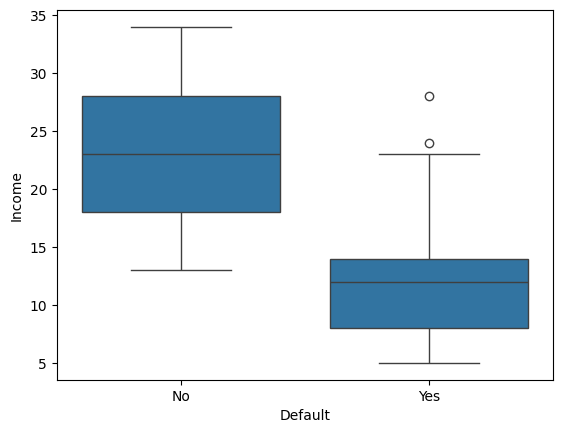

In [83]:
ax = sns.boxplot(data = loans, x = 'Default' , y = 'Income')

- Shows that the lower income group are more likely to default

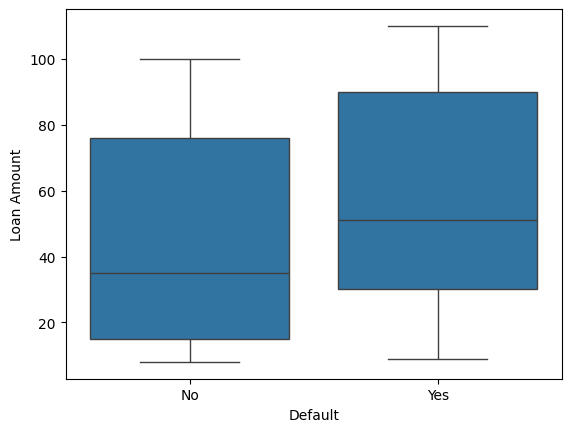

In [84]:
ax = sns.boxplot(data = loans, x = 'Default' , y = 'Loan Amount')

-  shows that the Higher the loan amount, more likely it might be defaulted

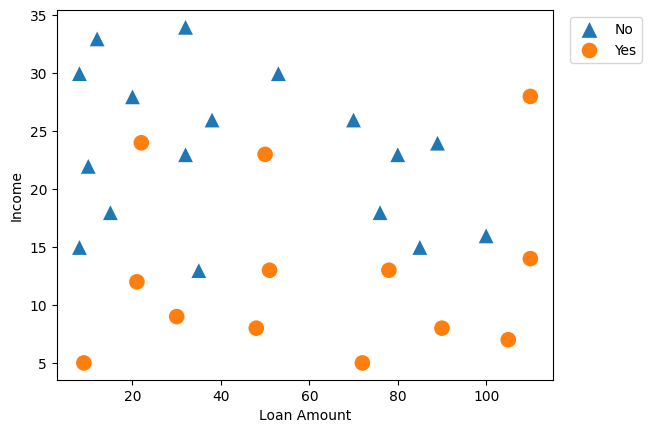

In [85]:
ax = sns.scatterplot(data = loans, 
                     x = 'Loan Amount', 
                     y = 'Income', 
                     hue = 'Default', 
                     style = 'Default', 
                     markers = ['^','o'], 
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

### Step 3.1 Comparision visualization

#### Scatter Plot

### Step 3.2 Relationship visualization

#### Scatter plot

### Step 3.3 Distribution visualization

#### Histogram

### Step 3.4 Composition visualization

----

## Module 4: DATA MODELLING: Prepare the data

### Step 4.1 Prepare the Data: Split the data into dependent and independent variables

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
### Step 4.1.1 : Separate the dependent and independent variables

In [88]:
y = loans[['Default']] # Dependent Variable

In [89]:
X = loans[['Income','Loan Amount']] # Independent Variables

### Step 4.1.2 : Split the data

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=1234)


Split the data:

python
- X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=1234)

- train_size=0.8 means 80% of the data will be used for training, and 20% for testing.
- stratify=y ensures the split maintains the same proportion of classes as in the original dataset.
- random_state=1234 ensures reproducibility of the results.


This process helps in evaluating the model's performance on unseen data.

In [91]:
X_train.shape, X_test.shape

((24, 2), (6, 2))

## 4. Module 5: Train and Evaluate the Classification Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 1234)

In [96]:
model = classifier.fit(X_train, y_train)

In [98]:
model.score(X_test, y_test)

0.5

## Module 6. Visualize the Classification Tree

In [99]:
from sklearn.tree import plot_tree

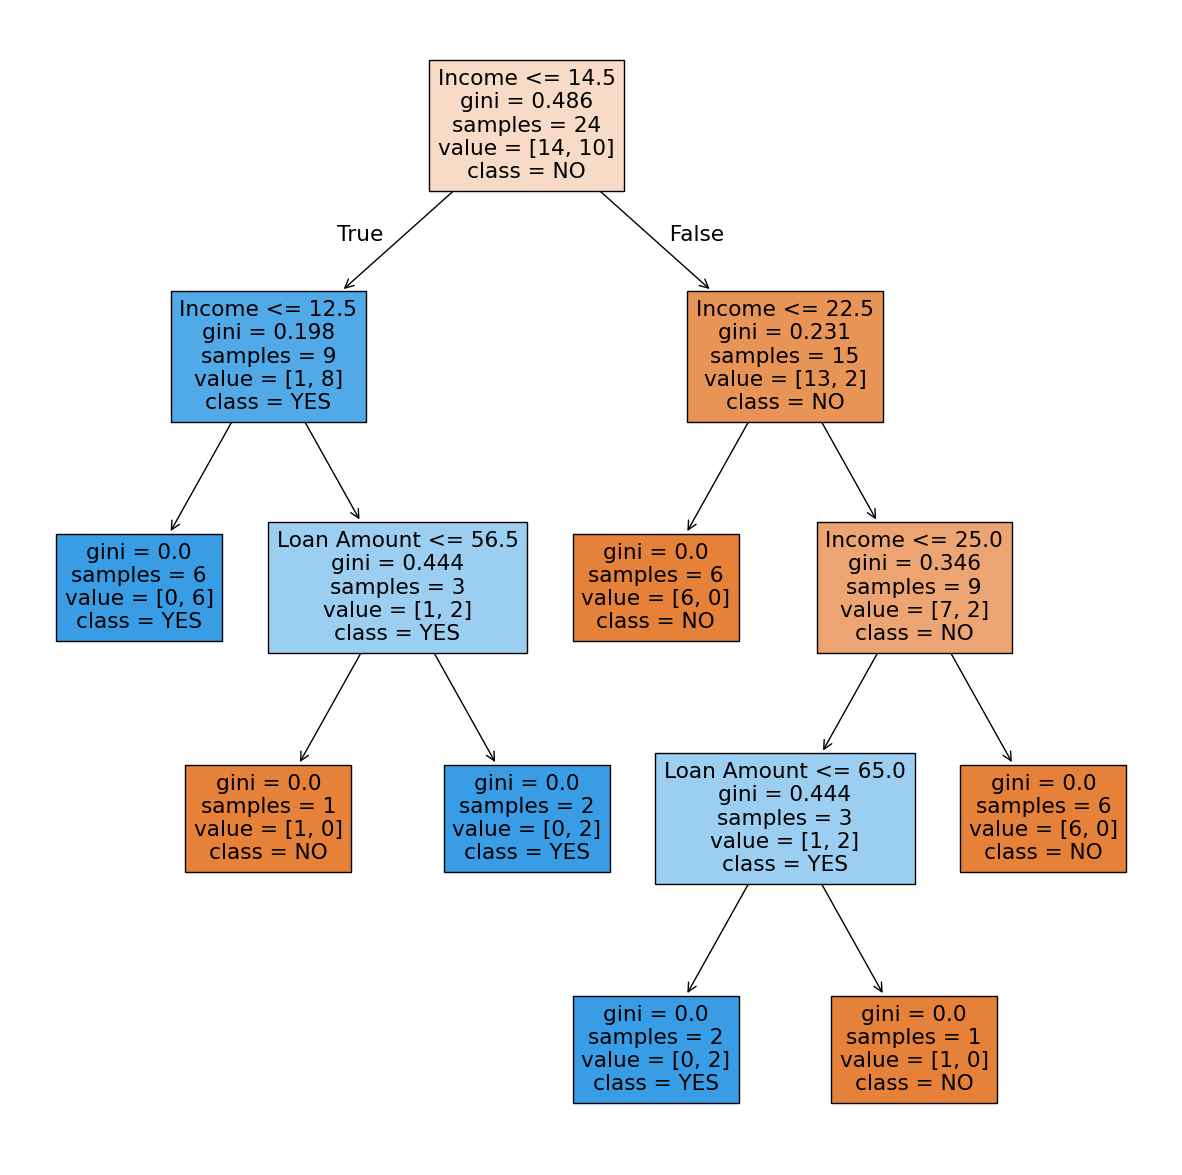

In [107]:
plt.figure(figsize = (15,15))
plot_tree(model,
          feature_names = list(X.columns),
          class_names = ['NO','YES'],
          filled = True); 


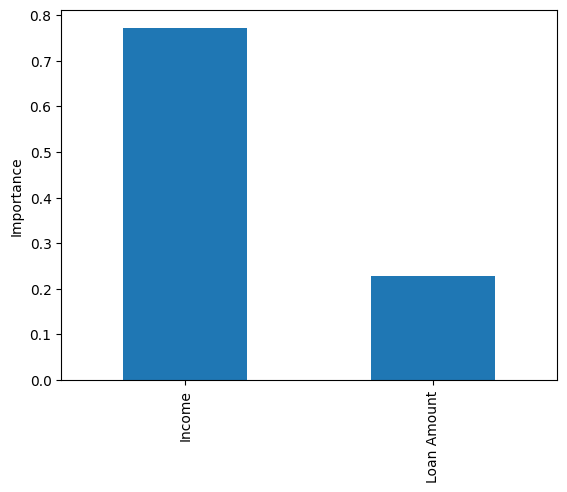

In [101]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

## Module 7: Prune the Classification Tree

Objectives:
- Identifying Overfitting: How to detect overfitting by comparing the accuracy scores of the training data and test data.
- Pruning Techniques: It covers two pruning methods: pre-pruning (setting parameters to limit tree growth) and post-pruning (reducing tree size after full growth).
- Hyperparameter Tuning: Using the GridSearchCV class from scikit-learn to find the best combination of parameters for the decision tree.
- Improved Model Performance: By pruning, the model's accuracy on test data improves, indicating better generalization.

**Overfitting**: Overfitting in decision trees occurs when the model performs exceptionally well on the training data but poorly on new, unseen test data. This happens because the tree has become too complex, capturing noise and details specific to the training data rather than general patterns.

In [108]:
model.score(X_train, y_train)

1.0

In [109]:
model.score(X_test, y_test)

0.5

In [117]:
grid = {'max_depth':[2,3,4,5],
       'min_samples_split': [2,3,4],
       'min_samples_leaf': [1,2,3,4,5,6]}

In [118]:
from sklearn.model_selection import GridSearchCV

In [120]:
classifier = DecisionTreeClassifier(random_state = 1234)
gcv = GridSearchCV(estimator = classifier,param_grid=grid, cv=5)
gcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]})

In [123]:
model_ = gcv.best_estimator_
model_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, random_state=1234)

In [124]:
model_.score(X_train, y_train)

0.875

In [125]:
model_.score(X_test, y_test)

0.8333333333333334

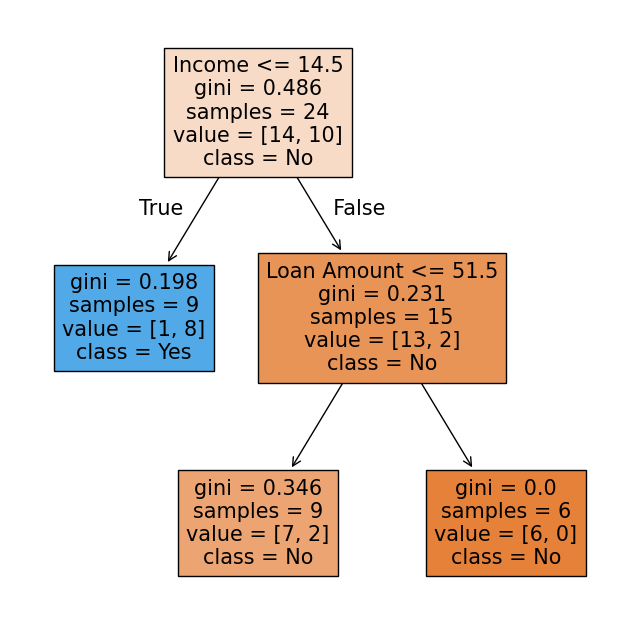

In [126]:
plt.figure(figsize = (8,8))
tree.plot_tree(model_, 
                   feature_names = list(X.columns), 
                   class_names = ['No','Yes'],
                   filled = True);